## Step 1: Reading and understanding the data

Let us first import the important libraries Numpy and Pandas and read rhe data set.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_sharing = pd.read_csv("day.csv")

In [3]:
#Check the head of the data set
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike_sharing dataframe

In [4]:
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Deleting the unwanted columns and finding the new structure of the data set.
unwanted_cols = ["instant","dteday","casual","registered"]
bike_sharing.drop(labels = unwanted_cols, axis = 1, inplace = True)
bike_sharing.shape

(730, 12)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it.
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable.
We'll visualise our data using matplotlib and seaborn.

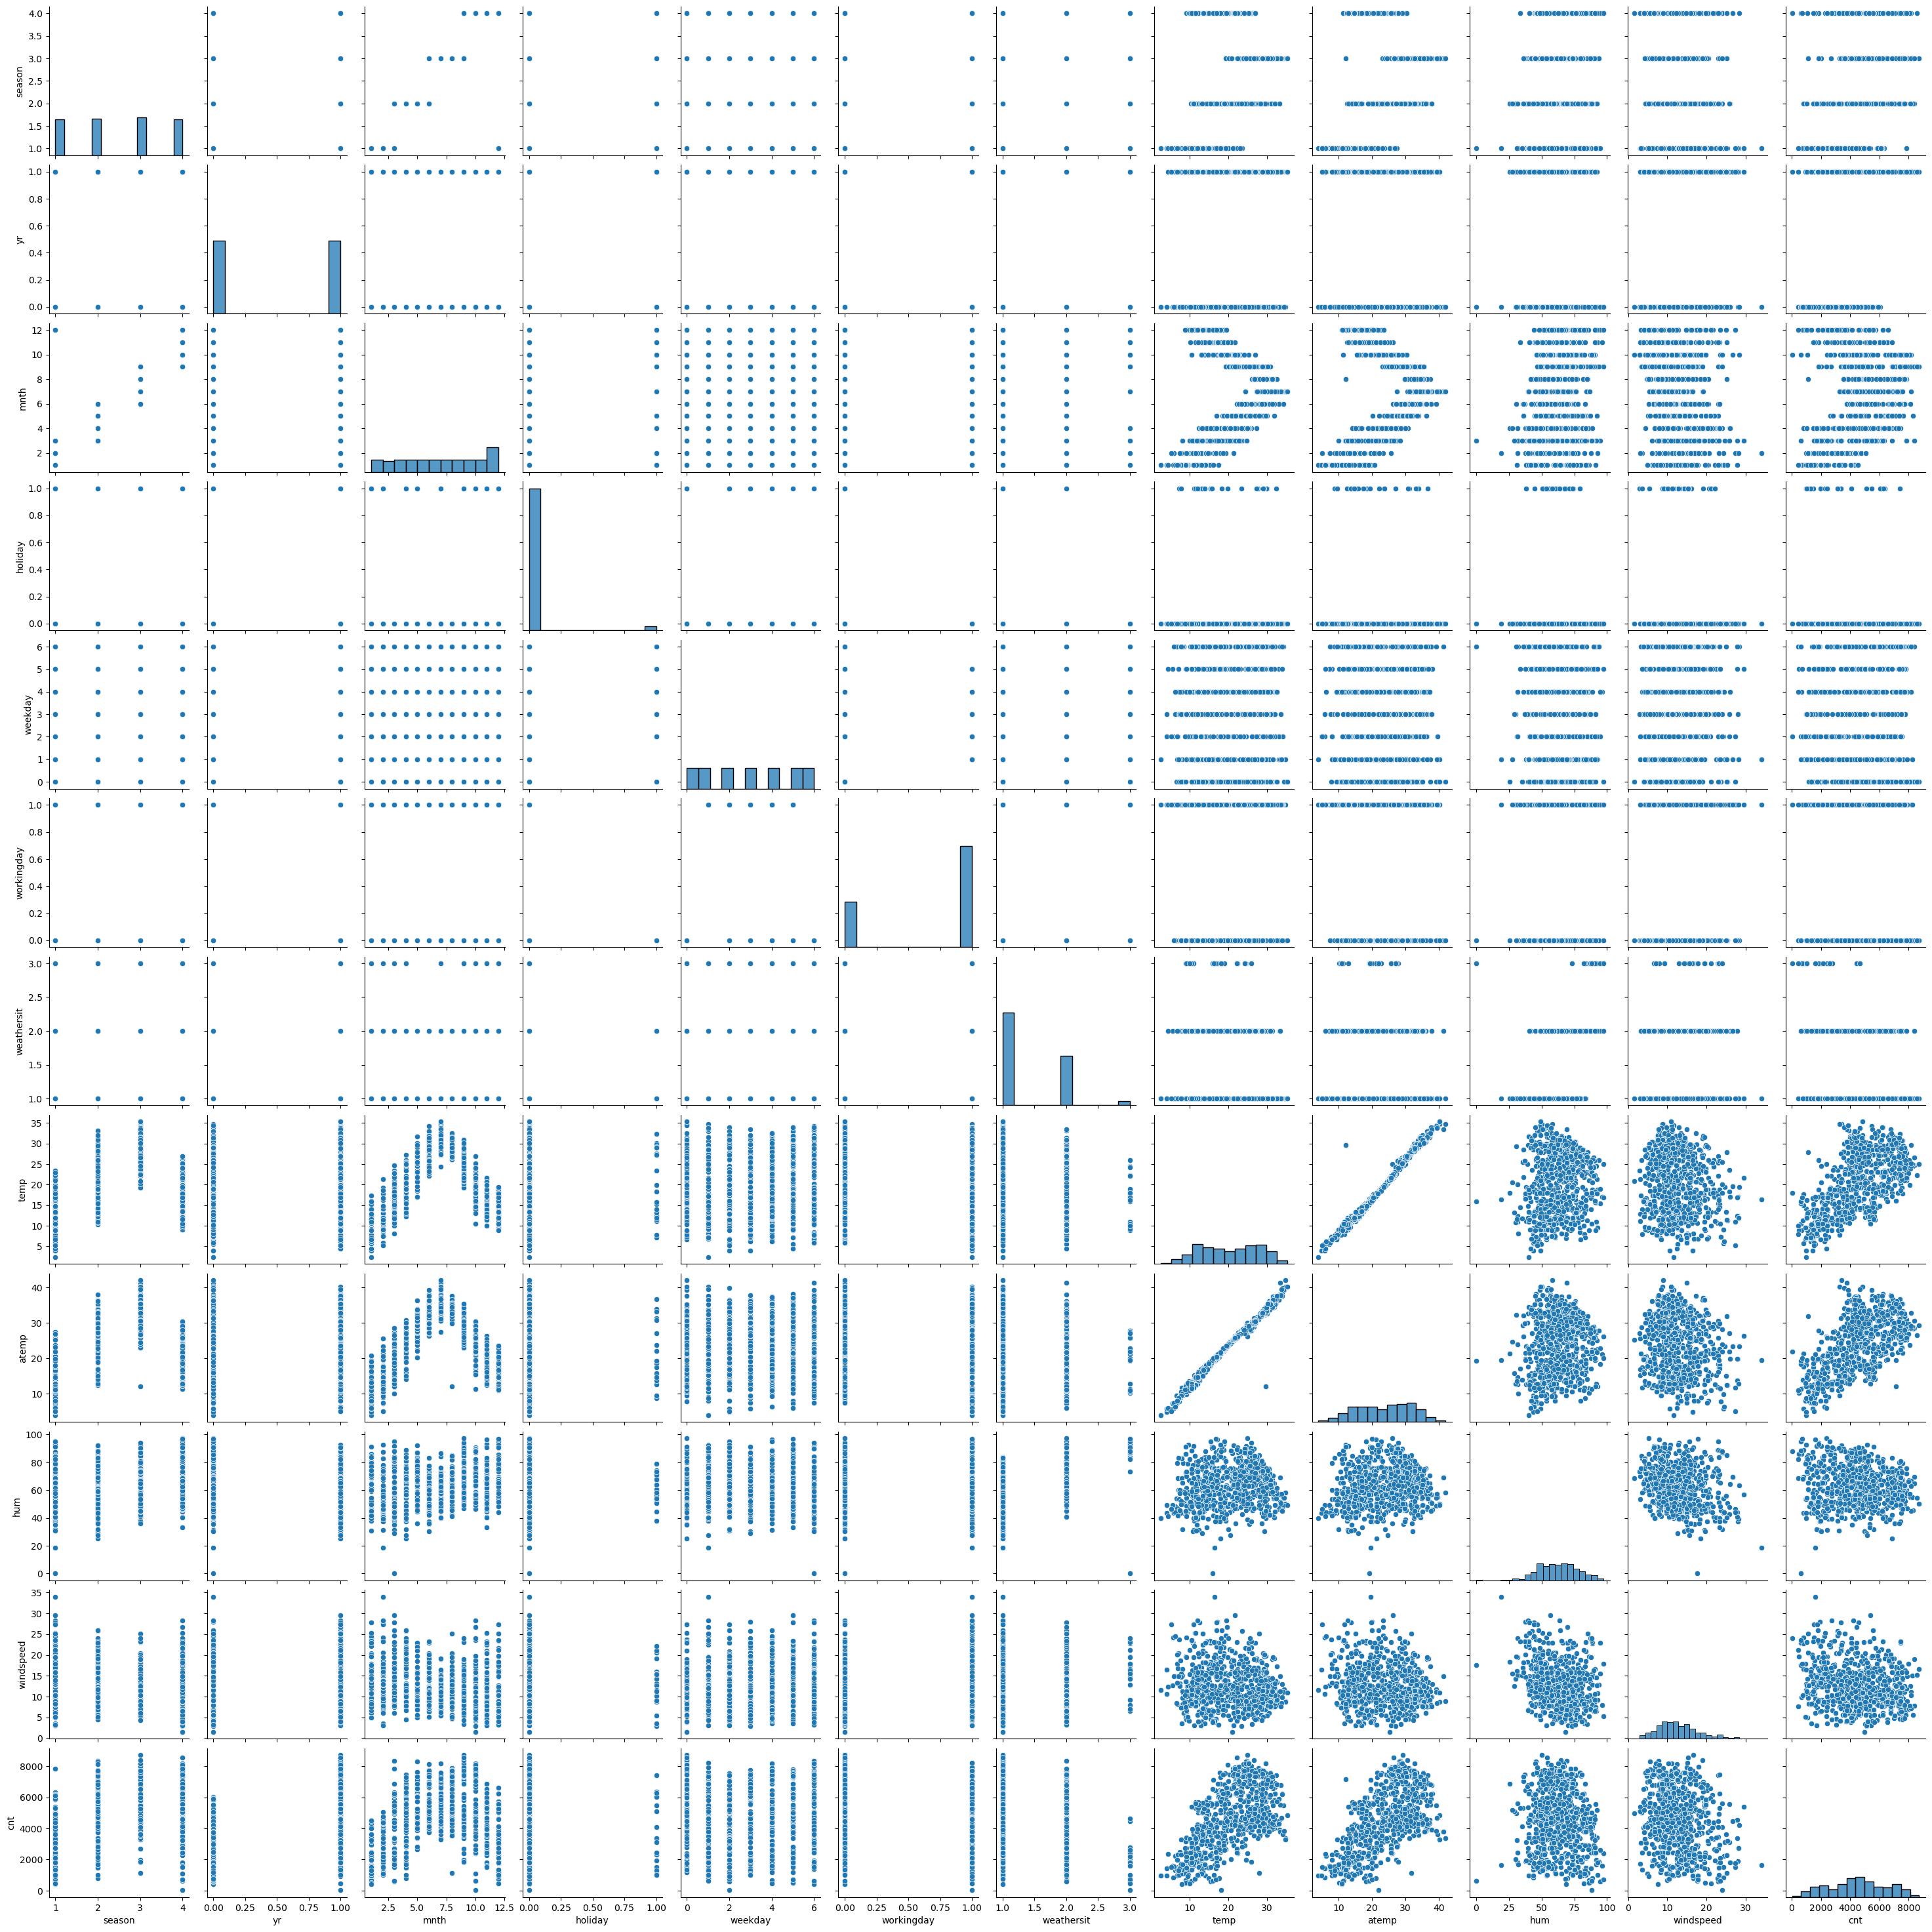

In [9]:
sns.pairplot(bike_sharing)
plt.show()

### Visualising the categorical variables

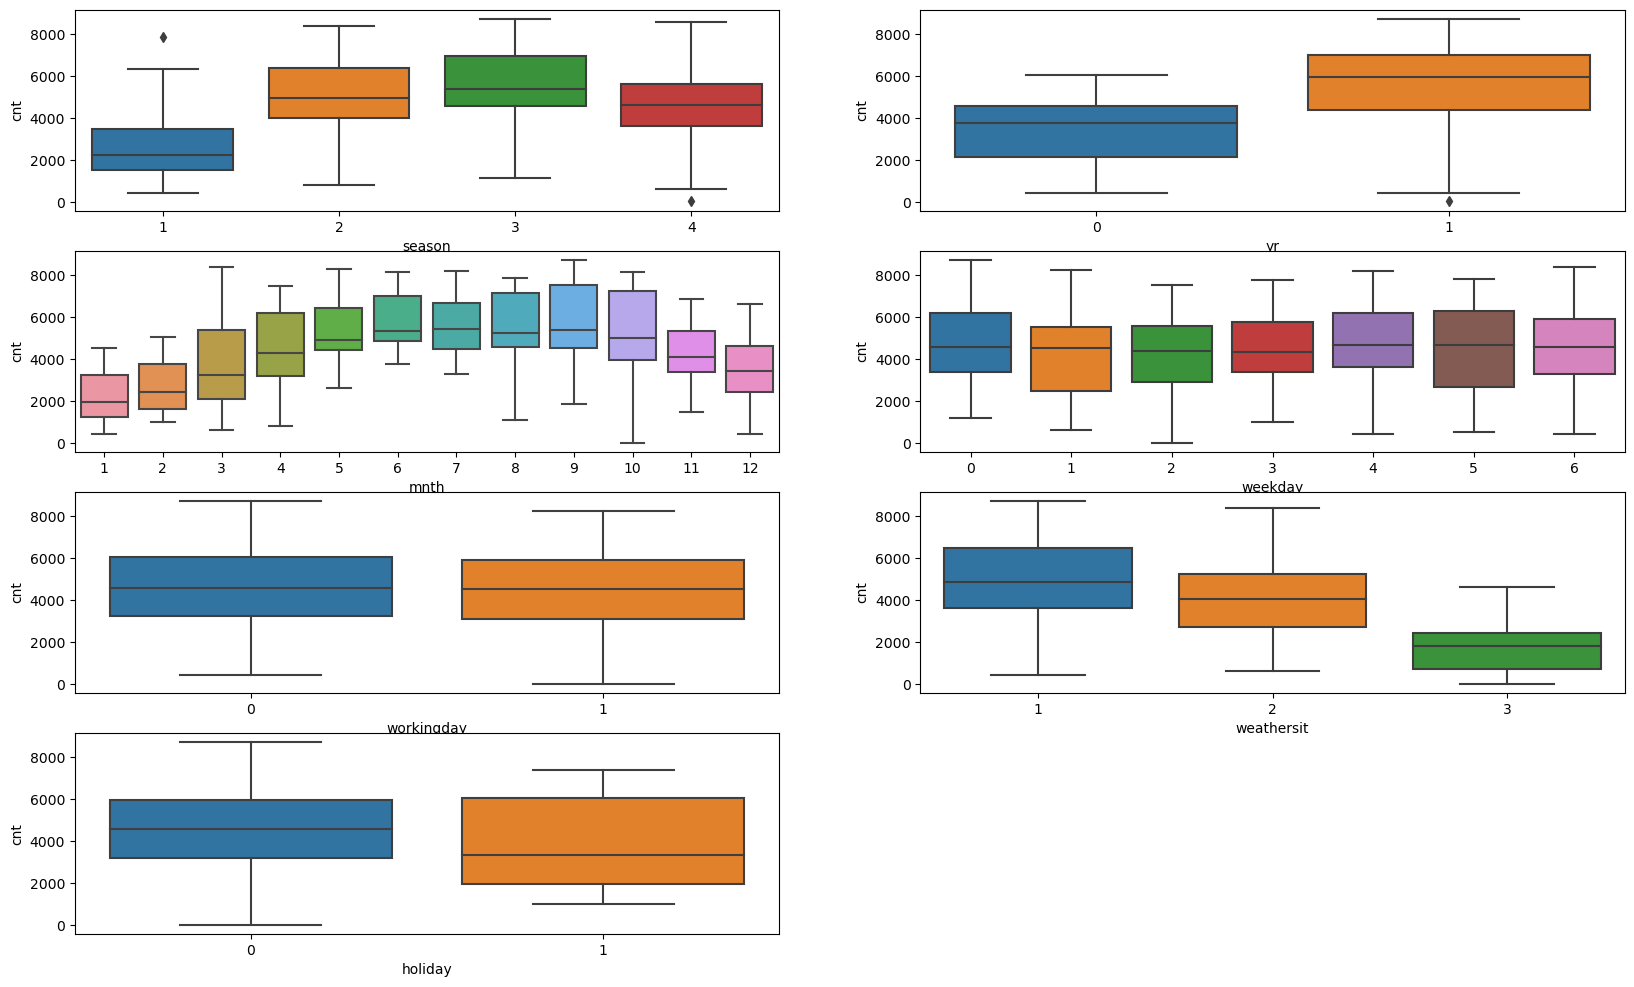

In [10]:
plt.figure(figsize = (20,12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season',y = 'cnt', data = bike_sharing)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr',y = 'cnt', data = bike_sharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth',y = 'cnt', data = bike_sharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday',y = 'cnt', data = bike_sharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday',y = 'cnt', data = bike_sharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit',y = 'cnt', data = bike_sharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday',y = 'cnt', data = bike_sharing)
plt.show()

## Step 3: Data Preparation

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). 
- These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). 

So, it is advisable to map such feature values into categorical string values.

In [11]:
bike_sharing["season"] = bike_sharing["season"].map({1: "spring", 2:"summer", 3:"fall", 4:"winter"})
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_sharing["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

As we can see in weathersit column 1 ,2 , 3, 4 are represented as:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

But these are very long sentences to use in our model. Let us shorten them as : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy - **clear**
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - **mist**
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - **light snow**
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - **heavy rain**

In [13]:
bike_sharing["weathersit"] = bike_sharing["weathersit"].map({1: "clear", 2:"mist", 3:"light snow", 4:"heavy rain"})
bike_sharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,clear,6.184153,7.54440,48.2917,14.958889,1321


## Dummy Variables

The variable season and weathersit has four levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [14]:
# Get the dummy variables for the feature "season" and store it in a new variable - 'season_status'
season_status = pd.get_dummies(bike_sharing['season'])

# Check what the dataset 'season_status' looks like
season_status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, you don't need four columns. You can drop the  column, as the type of season can be identified with just the three columns where —

- 000 will correspond to fall
- 100 will correspond to spring
- 010 will correspond to summer
- 001 will correspond to winter
  

In [15]:
# Let's drop the first column from season_status df using 'drop_first = True'

season_status = pd.get_dummies(bike_sharing['season'], drop_first = True)

In [16]:
# Add the results to the original bike_sharing dataframe

bike_sharing = pd.concat([bike_sharing, season_status], axis = 1)

In [17]:
# Now let's see the head of our dataframe.

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [18]:
# Similarly, get the dummy variables for the feature "weathersit" and store it in a new variable - 'weathersit_season_status'
weathersit_status = pd.get_dummies(bike_sharing['weathersit'])

# Check what the dataset 'weathersit_status' looks like
weathersit_status.head()

,clear,light snow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the column, as the type of weathers can be identified with just the two columns where —

- 00 will correspond to clear
- 10 will correspond to light snow
- 01 will correspond to mist 

In [19]:
# Let's drop the first column from weathersit_status df using 'drop_first = True'

weathersit_status = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)

In [20]:
# Add the results to the original bike_sharing dataframe

bike_sharing = pd.concat([bike_sharing, weathersit_status], axis = 1)

In [21]:
# Now let's see the head of our dataframe.

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [22]:
# Drop the season and weathersit variable as we have created dummies for it.
bike_sharing.drop(['season','weathersit'], axis = 1, inplace = True)

In [23]:
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
# Let us Find out the shape of the train and test dataframe.
print(df_train.shape)
print(df_test.shape)

(510, 15)
(219, 15)


### Rescaling the features

We will use the MinMax scaling or normalisation to scale the features.


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['mnth','weekday','temp','atemp','hum','windspeed','cnt']

# Apply scaler() to all the columns except the 'yr','holiday','workingday' and 'dummy' variables

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
653,1,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


In [28]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.491830,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.315338,0.157763,0.329528,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


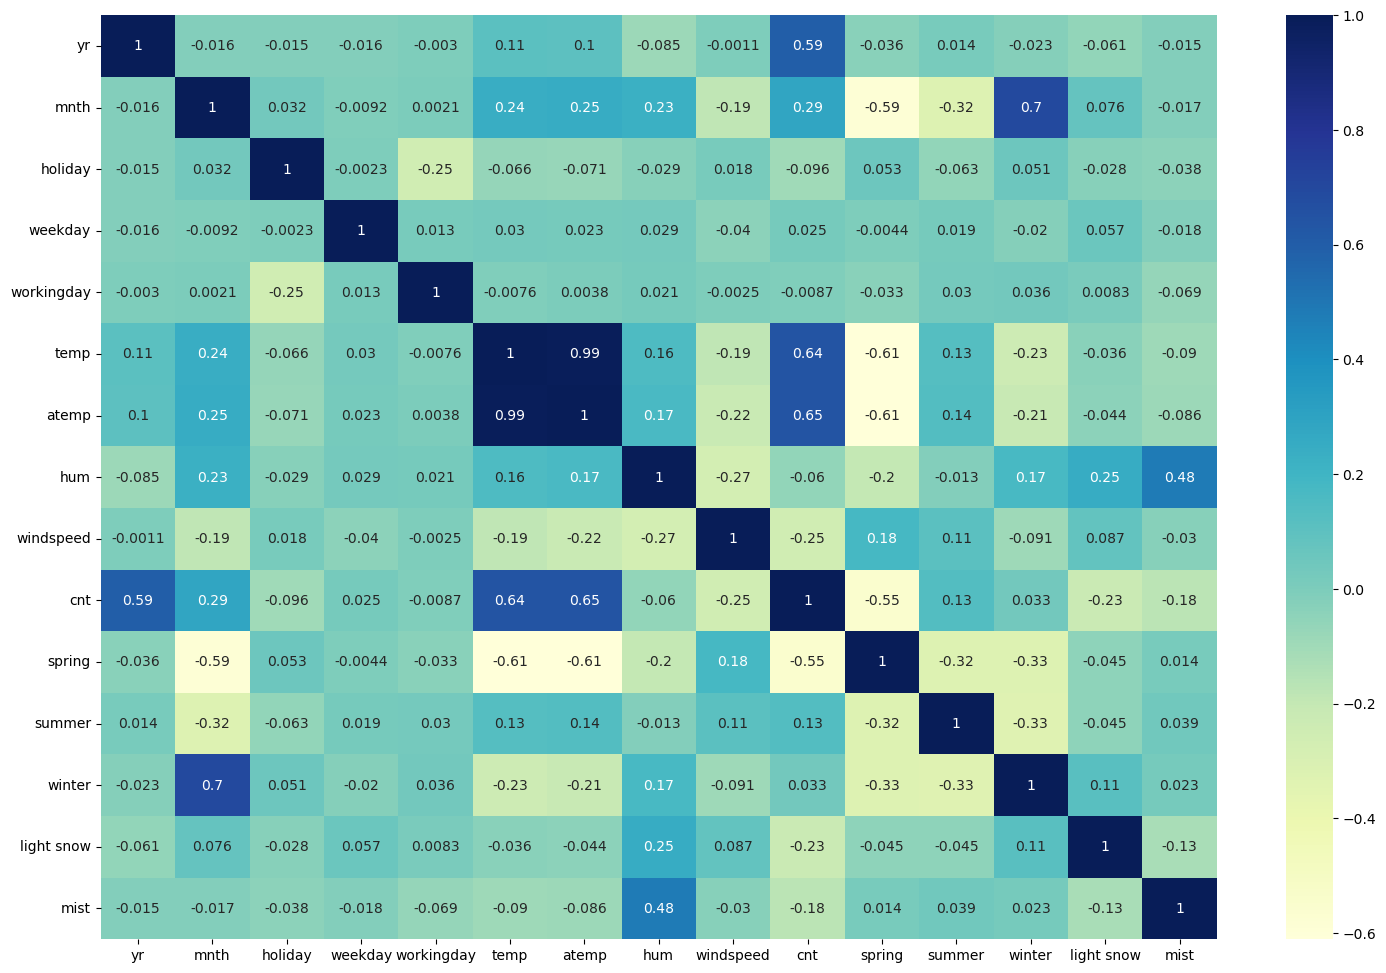

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18,12))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observation 1**: We can see a good correlation between **cnt** and **atemp**. 
So, we will pick atemp as the first variable and after that we will keep adding the other variable for our model building process.

### Dividng into X and Y sets for model building

In [30]:
y_train= df_train.pop("cnt")
x_train = df_train 

## Step 5: Building the linear model

In [31]:
# Let us first import the libraries for buliding the model
import statsmodels.api as sm

In [32]:
#Add a constant 
x_train_sm = sm.add_constant(x_train['atemp'])

#Create a first model
model = sm.OLS(y_train, x_train_sm)

#Fit
model_fit = model.fit()

#Params
model_fit.params

const    0.162924
atemp    0.683633
dtype: float64

In [33]:
#Summary of the linear regression model obtained

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.10e-61
Time:                        23:29:03   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

**Observation 2:** Even though ‘atemp’ is the most correlated variable, it could explain only 41% of the variance. After that, we will add 'temp' as it had the second-highest correlation with the target variable. 

In [34]:
# Add another variable temp

x_train_sm = x_train[['atemp','temp']]
x_train_sm = sm.add_constant(x_train_sm)

#Create second model
model = sm.OLS(y_train, x_train_sm)

#Fit
model_fit = model.fit()

# Summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.95e-60
Time:                        23:29:03   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation 3:** As we can see that after adding temp to the model **R-squared** hasn't change much also the p-value is greater tha 0.05. So, we can say that **temp** variable is statstically not significant.
Now let us add **yr** to the model

In [35]:
## Add another variable yr

x_train_sm = x_train[['atemp','yr']]
x_train_sm = sm.add_constant(x_train_sm)

# create model
model = sm.OLS(y_train, x_train_sm)

# Fit
model_fit = model.fit()

#Summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.07e-131
Time:                        23:29:03   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.000       0.043       0.102
atemp          0.6252      0.026     24.001      0.000       0.574       0.676
yr             0.2378      0.011     21.511      0.000       0.216       0.260
==============================================================================
Omnibus:                       38.030   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.520
Skew:                          -0.536   Prob(JB):                     1.96e-13
Kurtosis:                       4.266   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation 4:** So, we can see that after adding the **yr** variable. R-squared value has significantly increased from 41% to 61%, Which is a good increase. Also, the p - values are less than 0.05.

Now let us take all the varibles.

### Adding all the variables


In [36]:
# Check all the columns of the dataframe

bike_sharing.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'light snow',
       'mist'],
      dtype='object')

In [37]:
import statsmodels.api as sm
#Build a linear model
x_train_lm = sm.add_constant(x_train)

#create and fit the model
model_1 = sm.OLS(y_train, x_train_lm).fit()

#Summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          8.32e-180
Time:                        23:29:03   Log-Likelihood:                 489.58
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     495   BIC:                            -885.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2900      0.039      7.512      0.000       0.214       0.366
yr             0.2312      0.008     27.285      0.000       0.215       0.248
mnth           0.0152      0.026      0.581      0.561      -0.036       0.066
holiday       -0.1018      0.028     -3.695      0.000      -0.156      -0.048
weekday        0.0177      0.013      1.388      0.166      -0.007       0.043
workingday    -0.0201      0.010     -2.091      0.037      -0.039      -0.001
temp           0.4342      0.141      3.081      0.002       0.157       0.711
atemp          0.0603      0.144      0.419      0.676      -0.223       0.343
hum           -0.1362      0.039     -3.457      0.001      -0.214      -0.059
windspeed     -0.1781      0.027     -6.503      0.000      -0.232      -0.124
spring        -0.0708      0.023     -3.031      0.003      -0.117      -0.025
summer         0.0451      0.016      2.844      0.005       0.014       0.076
winter         0.0830      0.019      4.404      0.000       0.046       0.120
light snow    -0.2439      0.028     -8.830      0.000      -0.298      -0.190
mist          -0.0557      0.011     -5.043      0.000      -0.077      -0.034
==============================================================================
Omnibus:                       67.270   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.427
Skew:                          -0.686   Prob(JB):                     3.25e-36
Kurtosis:                       5.410   Cond. No.                         92.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
- We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

In [38]:
#Checking for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# Creating a dateframe that will contain the name of all the feature variables with their VIFs

vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,379.46
6,atemp,368.00
7,hum,31.14
1,mnth,12.34
8,windspeed,5.04
11,winter,4.68
9,spring,4.39
4,workingday,3.69
3,weekday,3.21
10,summer,2.71


We generally want a VIF that is less than 5. So there are some variables that clearly needs to be dropped. 

### Dropping the variable and updating the model

As we can see **atemp** variable has VIF greater than 5 and p-value greater than 0.05. So we can drop atemp variable.  

In [40]:
X = x_train.drop('atemp', 1,)

In [41]:
#Build another model
x_train_lm = sm.add_constant(X)

#Fit
model_2 = sm.OLS(y_train, x_train_lm).fit()

#Summary
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          6.53e-181
Time:                        23:29:03   Log-Likelihood:                 489.49
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     496   BIC:                            -891.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2896      0.039      7.511      0.000       0.214       0.365
yr             0.2311      0.008     27.305      0.000       0.215       0.248
mnth           0.0152      0.026      0.583      0.560      -0.036       0.066
holiday       -0.1021      0.028     -3.708      0.000      -0.156      -0.048
weekday        0.0174      0.013      1.368      0.172      -0.008       0.042
workingday    -0.0199      0.010     -2.071      0.039      -0.039      -0.001
temp           0.4914      0.035     14.213      0.000       0.424       0.559
hum           -0.1354      0.039     -3.445      0.001      -0.213      -0.058
windspeed     -0.1804      0.027     -6.721      0.000      -0.233      -0.128
spring        -0.0698      0.023     -3.006      0.003      -0.115      -0.024
summer         0.0463      0.016      2.963      0.003       0.016       0.077
winter         0.0844      0.019      4.544      0.000       0.048       0.121
light snow    -0.2447      0.028     -8.881      0.000      -0.299      -0.191
mist          -0.0558      0.011     -5.058      0.000      -0.078      -0.034
==============================================================================
Omnibus:                       66.058   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.770
Skew:                          -0.673   Prob(JB):                     1.23e-35
Kurtosis:                       5.398   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Checking the VIF again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,hum,31.10
5,temp,16.56
1,mnth,12.34
7,windspeed,4.80
10,winter,4.55
8,spring,4.32
4,workingday,3.68
3,weekday,3.19
9,summer,2.62
12,mist,2.36


**Observation 5** : 
- We can observe from new model and VIF that mnth variable has the p-value greater than 0.05 and VIF greater than 5.
- Now, dropping mnth column and updating new model.


In [43]:
#Drop mnth varible fromm the model
X = X.drop('mnth', 1)

In [44]:
#Bulid another model 
x_train_lm = sm.add_constant(X)

#Fit
model_3 = sm.OLS(y_train, x_train_lm).fit()

#Summary
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.2
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          5.33e-182
Time:                        23:29:03   Log-Likelihood:                 489.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     497   BIC:                            -897.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2971      0.036      8.179      0.000       0.226       0.369
yr             0.2309      0.008     27.324      0.000       0.214       0.248
holiday       -0.1016      0.028     -3.696      0.000      -0.156      -0.048
weekday        0.0174      0.013      1.371      0.171      -0.008       0.042
workingday    -0.0201      0.010     -2.095      0.037      -0.039      -0.001
temp           0.4923      0.035     14.258      0.000       0.424       0.560
hum           -0.1333      0.039     -3.408      0.001      -0.210      -0.056
windspeed     -0.1800      0.027     -6.713      0.000      -0.233      -0.127
spring        -0.0759      0.021     -3.671      0.000      -0.117      -0.035
summer         0.0421      0.014      3.033      0.003       0.015       0.069
winter         0.0888      0.017      5.242      0.000       0.056       0.122
light snow    -0.2456      0.027     -8.934      0.000      -0.300      -0.192
mist          -0.0562      0.011     -5.102      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       66.149   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.651
Skew:                          -0.673   Prob(JB):                     7.91e-36
Kurtosis:                       5.407   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Checking the VIF again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,1) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.11
1,holiday,1.11
2,weekday,1.11
3,workingday,1.11
4,temp,1.11
5,hum,1.11
6,windspeed,1.11
7,spring,1.11
8,summer,1.11
9,winter,1.11


**Observation 6**: If we look at the weekday variable then it has high p-value but low VIF. Let's check dropping weekday variable brings changes to our model or not.


In [46]:
#Drop weekday from the model
X = X.drop('weekday', 1)

In [47]:
#Build a new model
x_train_lm = sm.add_constant(X)

#Fit
model_4 = sm.OLS(y_train,x_train_lm).fit()

#Summary
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          8.96e-183
Time:                        23:29:03   Log-Likelihood:                 488.35
No. Observations:                 510   AIC:                            -952.7
Df Residuals:                     498   BIC:                            -901.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3047      0.036      8.481      0.000       0.234       0.375
yr             0.2307      0.008     27.281      0.000       0.214       0.247
holiday       -0.1014      0.028     -3.685      0.000      -0.155      -0.047
workingday    -0.0199      0.010     -2.075      0.038      -0.039      -0.001
temp           0.4938      0.035     14.300      0.000       0.426       0.562
hum           -0.1331      0.039     -3.399      0.001      -0.210      -0.056
windspeed     -0.1816      0.027     -6.775      0.000      -0.234      -0.129
spring        -0.0750      0.021     -3.626      0.000      -0.116      -0.034
summer         0.0428      0.014      3.077      0.002       0.015       0.070
winter         0.0890      0.017      5.252      0.000       0.056       0.122
light snow    -0.2434      0.027     -8.862      0.000      -0.297      -0.189
mist          -0.0563      0.011     -5.109      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       69.612   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.361
Skew:                          -0.712   Prob(JB):                     4.55e-37
Kurtosis:                       5.418   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Let us check the VIF for the above model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,1) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.11
1,holiday,1.11
2,workingday,1.11
3,temp,1.11
4,hum,1.11
5,windspeed,1.11
6,spring,1.11
7,summer,1.11
8,winter,1.11
9,light snow,1.11


After dropping the weekday variable we can see all the features are under 5. But we can see workingday still has the p-value 0.038 which is highest among.Let us drop this and see what impact does model have. 

In [49]:
#Drop workingday from the model
X = X.drop('workingday',1)

In [50]:
#Build the new model
x_train_lm = sm.add_constant(X)

#Create and fit the model
model_5 = sm.OLS(y_train, x_train_lm).fit()

#Summary
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          4.78e-183
Time:                        23:29:03   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2925      0.036      8.224      0.000       0.223       0.362
yr             0.2307      0.008     27.186      0.000       0.214       0.247
holiday       -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp           0.4961      0.035     14.324      0.000       0.428       0.564
hum           -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed     -0.1827      0.027     -6.794      0.000      -0.236      -0.130
spring        -0.0746      0.021     -3.597      0.000      -0.115      -0.034
summer         0.0421      0.014      3.024      0.003       0.015       0.070
winter         0.0883      0.017      5.194      0.000       0.055       0.122
light snow    -0.2409      0.028     -8.751      0.000      -0.295      -0.187
mist          -0.0537      0.011     -4.889      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Let us check the VIF for the above model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,1) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.04
1,holiday,1.04
2,temp,1.04
3,hum,1.04
4,windspeed,1.04
5,spring,1.04
6,summer,1.04
7,winter,1.04
8,light snow,1.04
9,mist,1.04


## Step 6: Residual Analysis 

Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set;

In [52]:
y_train_cnt = model_5.predict(x_train_lm)

<Axes: ylabel='Density'>

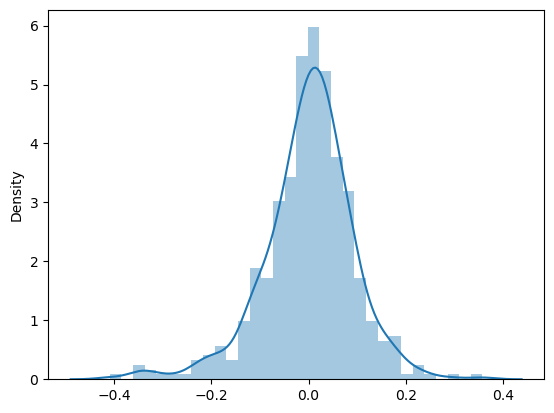

In [53]:
res = y_train - y_train_cnt
sns.distplot(res)

## Step 7: Predictions and Evaluation on the test Set

In [54]:
num_vars = ['mnth','weekday','temp','atemp','hum','windspeed','cnt']

# Apply scaler() to all the columns except the 'yr','holiday','workingday' and 'dummy' variables

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
184,0,0.545455,1,0.500000,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1,0.454545,0,0.666667,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0,0.818182,0,1.000000,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0,0.636364,0,0.833333,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0,0.454545,0,1.000000,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


In [55]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.516743,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,0.311080,0.188034,0.343089,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#Dividing into X and y test set

y_test = df_test.pop('cnt')
x_test = df_test

In [57]:
#Adding constant variable to test dataframe
x_test_md = sm.add_constant(x_test)
x_test_md.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
184,1.0,0,0.545455,1,0.500000,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,1,0.454545,0,0.666667,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,1.0,0,0.818182,0,1.000000,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,1.0,0,0.636364,0,0.833333,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0.454545,0,1.000000,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [58]:
#Dropping variables from x_test as we have don't have those variables in train set.
x_test_md = x_test_md.drop(['mnth','weekday','atemp','workingday'], axis = 1)

In [59]:
#Making predictions using the 5th model that was lastly created
y_pred_md = model_5.predict(x_test_md)


## Step 9:Model Evaluation

In [60]:
#import the R2 square
from sklearn.metrics import r2_score

In [61]:
print("Test score:" , r2_score(y_true = y_test, y_pred = y_pred_md ))
print("Train score:" ,r2_score(y_true = y_train, y_pred = y_train_cnt))

Test score: 0.8063526208371382
Train score: 0.8271752862671113


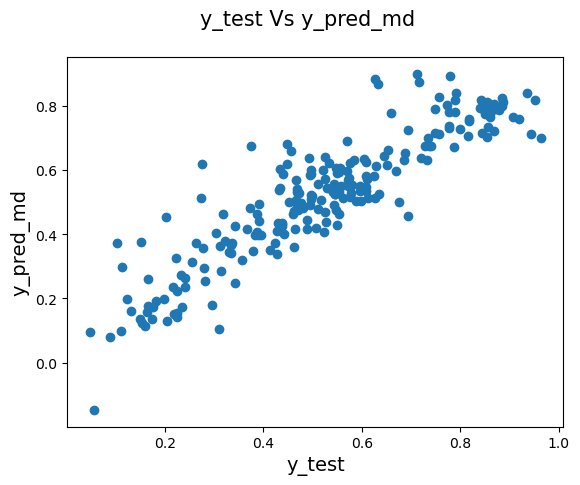

In [62]:
#Plotting y_test and y_pred_md to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred_md)
fig.suptitle('y_test Vs y_pred_md', fontsize = 15)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred_md', fontsize = 14)
plt.show()

We can see that equation of our best fitted line is:

**cnt = 0.2307 * yr - 0.865 * holiday + 0.4961 * temp - 0.1390 * hum - 0.1827 * windspeed - 0.0746 * spring + 0.0421 * summer +0.0883 * winter - 0.2409 * light snow - 0.0537 * mist**

Overall, we have got a decent model.
We can also acknowledge the selection of the features using RFE which is shown below.

## Using RFE

In [63]:
#Importing RFE and LInear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
#Running RFE with the output number of variable equal to 9
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 10)
rfe = rfe.fit(x_train, y_train)

In [65]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_ ))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [66]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'light snow', 'mist'],
      dtype='object')

In [67]:
x_train.columns[~rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'light snow', 'mist'],
      dtype='object')

### Building model using statsmodel for the detailed analysis

In [68]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

#Adding constant variable
x_train_rfe = sm.add_constant(x_train_rfe)

#Creating and fitting the model
model_rfe = sm.OLS(y_train, x_train_rfe).fit()

#Summary
model_rfe.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          4.78e-183
Time:                        23:29:04   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2925      0.036      8.224      0.000       0.223       0.362
yr             0.2307      0.008     27.186      0.000       0.214       0.247
holiday       -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp           0.4961      0.035     14.324      0.000       0.428       0.564
hum           -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed     -0.1827      0.027     -6.794      0.000      -0.236      -0.130
spring        -0.0746      0.021     -3.597      0.000      -0.115      -0.034
summer         0.0421      0.014      3.024      0.003       0.015       0.070
winter         0.0883      0.017      5.194      0.000       0.055       0.122
light snow    -0.2409      0.028     -8.751      0.000      -0.295      -0.187
mist          -0.0537      0.011     -4.889      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""